In [28]:
import pandas as pd  # Importing the pandas library for data manipulation and analysis
import seaborn as sns  # Importing seaborn for data visualization
import matplotlib.pyplot as plt  # Importing matplotlib for creating static, animated, and interactive visualizations
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler to normalize or standardize data
from sklearn.model_selection import train_test_split  # Importing train_test_split to split the dataset into training and testing sets
from sklearn.ensemble import RandomForestRegressor  # Importing RandomForestRegressor for building a random forest model
from sklearn.preprocessing import LabelEncoder  # Importing LabelEncoder to convert categorical labels into numerical format
import joblib  # Importing joblib to save and load machine learning models

In [29]:
data = pd.read_csv('shoe_size.csv')

In [30]:
data.tail(5)

,height,sex,shoe_size
125,180,M,43.0
126,185,M,46.0
127,188,M,46.0
128,190,M,46.0
129,175,M,44.0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   height     130 non-null    int64  
 1   sex        130 non-null    object 
 2   shoe_size  130 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ KB


In [32]:
data.isna().sum()

height       0
sex          0
shoe_size    0
dtype: int64

In [33]:
data.describe()

,height,shoe_size
count,130.000000,130.000000
mean,166.861538,40.180769
std,35.485285,5.206586
min,1.000000,35.000000
25%,163.000000,38.000000
50%,169.500000,39.000000
75%,175.000000,42.000000
max,364.000000,88.000000


In [34]:
data = data.drop_duplicates()

In [35]:
data

,height,sex,shoe_size
0,160,F,40.0
1,171,F,39.0
2,174,F,39.0
3,176,F,40.0
4,195,M,46.0
...,...,...,...
124,182,M,44.0
125,180,M,43.0
126,185,M,46.0
127,188,M,46.0


In [36]:
frequency = data['sex'].value_counts().sort_index()

In [37]:
frequency

sex
F      62
M      28
M       2
Name: count, dtype: int64

In [38]:
data['sex'] = data['sex'].str.strip()

In [39]:
frequency = data['sex'].value_counts().sort_index()

In [40]:
frequency

sex
F    62
M    30
Name: count, dtype: int64

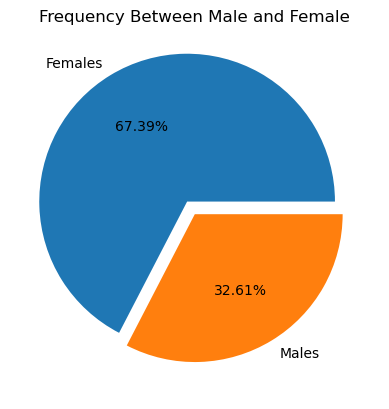

In [41]:
xplode = [0.1,0]
plt.pie(frequency, labels=['Females', 'Males'], explode=xplode, autopct='%.2f%%')
plt.title('Frequency Between Male and Female')
plt.show()

In [42]:
comax = data[['height', 'shoe_size']].corr()

<Axes: >

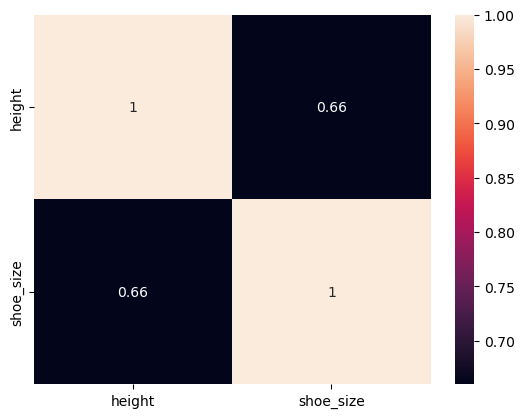

In [43]:
sns.heatmap(comax, annot=True)

In [44]:
data.head()

,height,sex,shoe_size
0,160,F,40.0
1,171,F,39.0
2,174,F,39.0
3,176,F,40.0
4,195,M,46.0


In [45]:
encoder = LabelEncoder()
data['encoded_sex'] = encoder.fit_transform(data['sex'])

In [46]:
data.head()

,height,sex,shoe_size,encoded_sex
0,160,F,40.0,0
1,171,F,39.0,0
2,174,F,39.0,0
3,176,F,40.0,0
4,195,M,46.0,1


In [47]:
x = data.iloc[:,[0,3]]
y = data['shoe_size']

In [21]:
#Let's scale our data 
pscaler = StandardScaler()
x = pscaler.fit_transform(x)

In [48]:
#Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 42)

In [49]:
pforest = RandomForestRegressor()
pforest.fit(x_train, y_train)

RandomForestRegressor()

In [50]:
accuracy = pforest.score(x_train, y_train)
accuracy * 100

91.3313645100225

In [51]:
prediction = pforest.predict(x_test)
prediction

array([36.6675    , 38.4465    , 43.68437302, 40.28416667, 37.21583929,
       37.61111905, 47.24      , 40.61      , 36.6675    , 37.92161905,
       36.6675    , 43.47475   , 43.07861905, 39.9265    , 38.4465    ,
       45.66      , 37.5025    , 37.5025    , 41.87902381])

In [26]:
joblib.dump(pscaler, 'Pscaler.pkl')

['Pscaler.pkl']

In [52]:
joblib.dump(pforest, 'Pforest.pkl')

['Pforest.pkl']